 ## 201804225 이다진 프로그래밍3
 ## -발표 과제 (Telecom users dataset - Practice classification with a telco dataset)

## 목차 
0. 발표에 대한 간단한 설명
1. 데이터 셋 설명 
2. 메모리 용량 줄이기
3. 분석 포인트 설명 및 EDA 및 시각화
4. 분석 결과
5. 중간 피드백 이후 관련 데이터 분석
6. 총 결론
___________________________________________________________________________________________________________________________________________________________________

## 0. 발표에 대한 간단한 설명

1. 발표 주제 : telecom 데이터를 이용한 4가지 분석포인트에 대해 분석하기
2. 발표 데이터 셋 설명 : Telecom users dataset의 경우 통신사에서 고객을 유지하기 위해 행동 예측을 하려는 데이터 세트로 통신사 고객 이탈 데이터 셋이다. 
    이 때, 한달 이내 이탈한 고객을 뜻하는 churn 열의 중심으로 각 고객이 가입한 서비스, 고객 계정 정보, 고객에 대한 인구 통계 정보가 나와있다.
3. 분석 포인트 : 이번 프로그래밍3 과제 분석에서 이 데이터를 가지고 고객 이탈 예측이 아닌, 서비스를 받기 위한 고객이 들어오려고 할 때 
    추천해줄 수 있는 가이드를 만들어보려고 했다. 
4. 이유 : 고객을 유지하기 위해서는 고객 이탈을 예측해서 막는 것도 중요하지만, 통신사를 이용하고 있는 고객들이 변화를 하고 싶어할 때 혹은 새로운 고객들이 들어올 때 
    이 고객들을 잡아, 통신사를 사용하게끔 유도하는 것도 중요하다고 본다. 

In [535]:
# 이 분석에서 사용한 lib = pandas, numpy, seaborn, matplotlib.pyplo

## 1. 데이터 셋 설명 

In [111]:
import pandas as pd
import numpy as np

In [112]:
telecom = pd.read_csv('P3_subject1/telecom_users.csv')
telecom = telecom.drop(['Dependents'], axis = 1)

In [113]:
telecom.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [114]:
telecom.shape

(5986, 21)

In [115]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [116]:
#데이터 딕셔너리
pd.read_csv('P3_subject1/telecom_data_dictionary.csv')

,coloumns,explain,kor_explain
0,customerID,customer id,고객ID
1,gender,client gender (male / female),성별
2,SeniorCitizen,"is the client retired (1, 0)",시니어시티즌(고령여부)
3,Partner,"is the client married (Yes, No)",파트너의 유무
4,tenure,how many months a person has been a client of ...,종신 재직원( 회사에 머문 월 수)
5,PhoneService,"is the telephone service connected (Yes, No)",전화 서비스
6,MultipleLines,"are multiple phone lines connected (Yes, No, N...",다중 선 (여러 회선을 가지고 있는지)
7,InternetService,"client's Internet service provider (DSL, Fiber...",인터넷 서비스
8,OnlineSecurity,"is the online security service connected (Yes,...",온라인 보안 유무
9,OnlineBackup,"is the online backup service activated (Yes, N...",온라인 백업 유무


데이터를 설명하는 사전은 위와 같이 존재한다. 
여기서 설명을 하자면, 크게 1. 한달 이내 이탈한 고객을 뜻하는 churn 2. 각 고객이 가입한 서비스 3.고객 계정 정보  4.고객에 대한 인구 통계 정보로 나눠진다. 
- 2번의 경우 전화, 여러 회선, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍TV및동영상
- 3번의 경우 고객, 계약, 결제 방법, 종이없는 청구서, 월별 요금 및 총 요금 
- 4번의 경우 성별, 연령대, 파트너 및 부양가족이 있는 경우
로 나타낸다. 

## 2. 메모리 용량 줄이기

In [118]:
#각 열의 행만 가져온다면
telecom.columns
#각 열의 인덱스만 가져온다면
telecom.index
#각 열의 데이터 가져온다면
telecom.to_numpy()

array([[1869, '7010-BRBUU', 'Male', ..., 24.1, '1734.65', 'No'],
       [4528, '9688-YGXVR', 'Female', ..., 88.15, '3973.2', 'No'],
       [6344, '9286-DOJGF', 'Female', ..., 74.95, '2869.85', 'Yes'],
       ...,
       [5226, '8044-BGWPI', 'Male', ..., 21.15, '306.05', 'No'],
       [5390, '7450-NWRTR', 'Male', ..., 99.45, '1200.15', 'Yes'],
       [860, '4795-UXVCJ', 'Male', ..., 19.8, '457.3', 'No']],
      dtype=object)

In [119]:
#info를 확인해보면 
#dtypes: float64(1), int64(3), object(18)
telecom.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object>

In [120]:
telecom.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [121]:
telecom.Churn.value_counts(normalize= True)

No     0.734881
Yes    0.265119
Name: Churn, dtype: float64

In [122]:
#describe를 통한 기술통계
telecom.describe(include ='object').T

,count,unique,top,freq
customerID,5986,5986,7493-GVFIO,1
gender,5986,2,Male,3050
Partner,5986,2,No,3082
PhoneService,5986,2,Yes,5396
MultipleLines,5986,3,No,2848
InternetService,5986,3,Fiber optic,2627
OnlineSecurity,5986,3,No,2982
OnlineBackup,5986,3,No,2605
DeviceProtection,5986,3,No,2640
TechSupport,5986,3,No,2960


In [123]:
telecom.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [124]:
# 데이터 용량 줄이기

In [125]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [126]:
telecom.memory_usage(deep=True)

Index                  128
Unnamed: 0           47888
customerID          401062
gender              371018
SeniorCitizen        47888
Partner             356078
tenure               47888
PhoneService        358570
MultipleLines       363982
InternetService     378885
OnlineSecurity      376834
OnlineBackup        377211
DeviceProtection    377176
TechSupport         376856
StreamingTV         377427
StreamingMovies     377460
Contract            408704
PaperlessBilling    356702
PaymentMethod       452395
MonthlyCharges       47888
TotalCharges        376432
Churn               354761
dtype: int64

In [127]:
#1. int64 형태 알아보기
#SeniorCitizen의 경우 1,0으로 나누어져 있어 int64의 값이 필요 없음, int8형태로 변환 #47888
telecom['SeniorCitizen'] = telecom['SeniorCitizen'].astype('category')

In [128]:
telecom.memory_usage(deep=True) #6082

Index                  128
Unnamed: 0           47888
customerID          401062
gender              371018
SeniorCitizen         6082
Partner             356078
tenure               47888
PhoneService        358570
MultipleLines       363982
InternetService     378885
OnlineSecurity      376834
OnlineBackup        377211
DeviceProtection    377176
TechSupport         376856
StreamingTV         377427
StreamingMovies     377460
Contract            408704
PaperlessBilling    356702
PaymentMethod       452395
MonthlyCharges       47888
TotalCharges        376432
Churn               354761
dtype: int64

In [129]:
print(6082 / 47888 * 100, '%')

12.700467758102238 %


In [130]:
#2. object형을 category로!
#customerID, TotalCharges를 제외한 나머지는 category형으로
telecom.select_dtypes(include=['object']).nunique()

customerID          5986
gender                 2
Partner                2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        5611
Churn                  2
dtype: int64

In [131]:
telecom['gender'] = telecom['gender'].astype('category')
telecom['Partner'] = telecom['Partner'].astype('category')
telecom['PhoneService'] = telecom['PhoneService'].astype('category')
telecom['MultipleLines'] = telecom['MultipleLines'].astype('category')
telecom['InternetService'] = telecom['InternetService'].astype('category')
telecom['OnlineSecurity'] = telecom['OnlineSecurity'].astype('category')
telecom['OnlineBackup'] = telecom['OnlineBackup'].astype('category')
telecom['DeviceProtection'] = telecom['DeviceProtection'].astype('category')
telecom['TechSupport'] = telecom['TechSupport'].astype('category')
telecom['StreamingTV'] = telecom['StreamingTV'].astype('category')
telecom['StreamingMovies'] = telecom['StreamingMovies'].astype('category')
telecom['Contract'] = telecom['Contract'].astype('category')
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].astype('category')
telecom['PaymentMethod'] = telecom['PaymentMethod'].astype('category')
telecom['Churn'] = telecom['Churn'].astype('category')
#telecom['TotalCharges'] = telecom['TotalCharges'].astype(np.float64)

In [132]:
telecom.memory_usage(deep=True)

Index                  128
Unnamed: 0           47888
customerID          401062
gender                6190
SeniorCitizen         6082
Partner               6185
tenure               47888
PhoneService          6185
MultipleLines         6258
InternetService       6253
OnlineSecurity        6261
OnlineBackup          6261
DeviceProtection      6261
TechSupport           6261
StreamingTV           6261
StreamingMovies       6261
Contract              6267
PaperlessBilling      6185
PaymentMethod         6450
MonthlyCharges       47888
TotalCharges        376432
Churn                 6185
dtype: int64

In [133]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int64   
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

In [134]:
#메모리 용량이 982.2+ KB -> 329.1+KB으로 절반 이상이 줄어듦을 알 수 있다! -> 용량 줄이기 성공!

## 3. 분석 포인트 설명 및 EDA 및 시각화

2. 본격적인 데이터 탐색과 분석 포인트 설명

- 분석 포인트 
1. 서비스를 받는 사람들이 매달 요금 내는 정도는 과연 어느 편에 속할 것인가? 
2. 서비스를 받는 사람들은 기기 보험을 들었을 것인가? 
3. 기기 보험을 든 사람들은 요금을 많이 내는 쪽인가, 적게 내는 쪽인가? 
4. 서비스를 받는 사람들은 Contract, InternetService는 어떻게 분포되어있는가? 

In [135]:
#filter 함수 적용하기 #telecom 관련 서비스만 
#기준 : **서비스를 connected 하는가를 다루는 열들만 
cols_one = [ c for c in telecom.columns if 'Service' in c]
print('cols:', cols_one)
cols_two = [ c for c in telecom.columns if 'Online' in c]
print('cols:', cols_two)
cols_third = [ c for c in telecom.columns if 'Streaming' in c]
print('cols:', cols_third)
cols_four = [ c for c in telecom.columns if 'Support' in c]
print('cols:', cols_four)
print('cols_all:', cols_one,cols_two,cols_third,cols_four)

cols: ['PhoneService', 'InternetService']
cols: ['OnlineSecurity', 'OnlineBackup']
cols: ['StreamingTV', 'StreamingMovies']
cols: ['TechSupport']
cols_all: ['PhoneService', 'InternetService'] ['OnlineSecurity', 'OnlineBackup'] ['StreamingTV', 'StreamingMovies'] ['TechSupport']


In [136]:
#서비스 관련 부분 Service로 따로 빼놓기
Service = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'StreamingMovies', 'TechSupport', 'MonthlyCharges']
telecom[Service]

,PhoneService,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,TechSupport,MonthlyCharges
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,24.10
1,Yes,Fiber optic,No,Yes,Yes,No,No,88.15
2,Yes,Fiber optic,No,No,No,No,No,74.95
3,Yes,DSL,No,No,No,Yes,No,55.90
4,Yes,DSL,Yes,No,No,No,No,53.45
...,...,...,...,...,...,...,...,...
5981,Yes,Fiber optic,Yes,No,Yes,Yes,No,95.00
5982,Yes,DSL,Yes,Yes,Yes,Yes,Yes,91.10
5983,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,21.15
5984,Yes,Fiber optic,No,No,Yes,Yes,No,99.45


분석 포인트 4가지를 잡았으므로 이와 관련된 EDA를 시작해보기!

In [137]:
#1. float64, int64 형변환 시키기 
#telecom.groupby('Unnamed: 0').size()
# Unnamed: 0에 대한 고유의 값이 2개 이상인 것이 없는 걸 확인함
telecom['Unnamed: 0'].value_counts().sort_index()

0       1
1       1
2       1
3       1
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: Unnamed: 0, Length: 5986, dtype: int64

In [138]:
np.finfo(np.float16) #finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

telecom[['tenure']].describe().T 

,count,mean,std,min,25%,50%,75%,max
tenure,5986.0,32.46876,24.516391,0.0,9.0,29.0,56.0,72.0


In [139]:
telecom['tenure'] = telecom['tenure'].astype(np.int8)
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int8    
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

In [140]:
telecom[['MonthlyCharges']].describe().T 

,count,mean,std,min,25%,50%,75%,max
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.9,118.75


In [141]:
# telecom['TotalCharges'] = telecom['TotalCharges'].astype(float) -> 에러 [could not convert string to float: '']
telecom['TotalCharges']= pd.to_numeric(telecom.TotalCharges, errors ='coerce')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int8    
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

In [142]:
#telecom.isna().sum() ->결측값 생김
telecom[telecom['TotalCharges'].isnull()]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,1340,1371-DWPAZ,Female,0,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,3826,3213-VVOLG,Male,0,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,5218,2923-ARZLG,Male,0,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,3331,7644-OMVMY,Male,0,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,936,5709-LVOEQ,Female,0,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,753,3115-CZMZD,Male,0,No,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,4380,2520-SGTTA,Female,0,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,488,4472-LVYGI,Female,0,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,1082,4367-NUYAO,Male,0,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


In [143]:
#min : 18.800000
telecom['TotalCharges'].describe()

count    5976.000000
mean     2298.060617
std      2274.127165
min        18.800000
25%       404.312500
50%      1412.150000
75%      3846.962500
max      8684.800000
Name: TotalCharges, dtype: float64

- 최소 값이 18.8이므로 결측값은 0 or 날리기(10개) -> 날리는걸 선택!

In [145]:
telecom.TotalCharges.dropna(0)

0       1734.65
1       3973.20
2       2869.85
3        238.50
4        119.50
         ...   
5981      95.00
5982    2198.30
5983     306.05
5984    1200.15
5985     457.30
Name: TotalCharges, Length: 5976, dtype: float64

In [146]:
telecom.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [151]:
# 중간평가때에는 np.float16 -> mean 값에서 inf가 나와 np.float32으로 형 변환
telecom['MonthlyCharges'] = telecom['MonthlyCharges'].astype(np.float32)
telecom['TotalCharges'] = telecom['TotalCharges'].astype(np.float32)

In [152]:
telecom['TotalCharges'].describe()

count    5976.000000
mean     2298.067383
std      2274.133545
min        18.796875
25%       404.250000
50%      1412.000000
75%      3846.500000
max      8688.000000
Name: TotalCharges, dtype: float64

In [153]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        5986 non-null   int64   
 1   customerID        5986 non-null   object  
 2   gender            5986 non-null   category
 3   SeniorCitizen     5986 non-null   category
 4   Partner           5986 non-null   category
 5   tenure            5986 non-null   int8    
 6   PhoneService      5986 non-null   category
 7   MultipleLines     5986 non-null   category
 8   InternetService   5986 non-null   category
 9   OnlineSecurity    5986 non-null   category
 10  OnlineBackup      5986 non-null   category
 11  DeviceProtection  5986 non-null   category
 12  TechSupport       5986 non-null   category
 13  StreamingTV       5986 non-null   category
 14  StreamingMovies   5986 non-null   category
 15  Contract          5986 non-null   category
 16  PaperlessBilling  5986 n

#메모리 용량이 982.2+ KB -> 329.1+KB-> (현재) 241.5+ KB

In [155]:
round(218.1/982.2, 2)

0.22

처음과 비교하면 22%의 메모리만 사용하여 매우 큰 메모리 세이브를 했다.

1. 한가지 이상 서비스를 받는 사람들이 매달 요금 내는 정도는 과연 어느 편에 속할 것인가?

In [156]:
# 서비스의 항목들만 있는 열을 가지고 오기
Services= telecom[Service]
Services.head()
Services.info() # 5986 

# 한 가지 이상 서비스를 받기 위해서는 PhoneService가 No인 사람들 : 약 10%
Services.PhoneService.value_counts() #590

#90%의 사람들을 뽑아내기 #5396명
is_Services = Services['PhoneService'] == 'Yes'
is_Services = Services[is_Services]
is_Services #5396

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PhoneService     5986 non-null   category
 1   InternetService  5986 non-null   category
 2   OnlineSecurity   5986 non-null   category
 3   OnlineBackup     5986 non-null   category
 4   StreamingTV      5986 non-null   category
 5   StreamingMovies  5986 non-null   category
 6   TechSupport      5986 non-null   category
 7   MonthlyCharges   5986 non-null   float32 
dtypes: category(7), float32(1)
memory usage: 65.1 KB


,PhoneService,InternetService,OnlineSecurity,OnlineBackup,StreamingTV,StreamingMovies,TechSupport,MonthlyCharges
0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,24.093750
1,Yes,Fiber optic,No,Yes,Yes,No,No,88.125000
2,Yes,Fiber optic,No,No,No,No,No,74.937500
3,Yes,DSL,No,No,No,Yes,No,55.906250
4,Yes,DSL,Yes,No,No,No,No,53.437500
...,...,...,...,...,...,...,...,...
5981,Yes,Fiber optic,Yes,No,Yes,Yes,No,95.000000
5982,Yes,DSL,Yes,Yes,Yes,Yes,Yes,91.125000
5983,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,21.156250
5984,Yes,Fiber optic,No,No,Yes,Yes,No,99.437500


In [157]:
#OnlineSecurity, OnlineBackup, StreamingTV, StreamingMovies, TechSupport의 경우 InternetService에 연관되어 있다.
is_Services.InternetService.value_counts("No") 

Fiber optic    0.486842
DSL            0.273907
No             0.239251
Name: InternetService, dtype: float64

- 약 77퍼의 사람들이 인터넷서비스를 제공받고 있다. 

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='InternetService'>

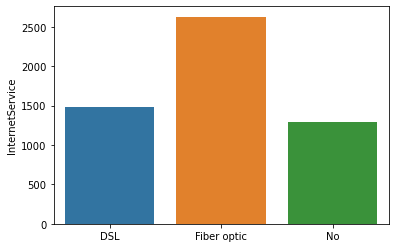

In [158]:
#seaborn
import seaborn as sns
sns.barplot(is_Services.InternetService.value_counts().index, is_Services.InternetService.value_counts())

In [159]:
Charge = telecom[['MonthlyCharges','TotalCharges']]

In [160]:
is_Services.groupby('InternetService').MonthlyCharges.agg(['mean','std'])

,mean,std
InternetService,,
DSL,64.558418,13.418059
Fiber optic,91.554604,12.715182
No,21.091825,2.186129


C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

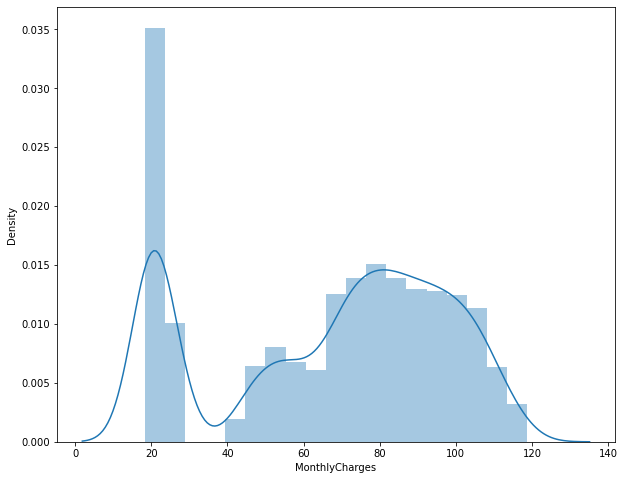

In [161]:
is_Services.MonthlyCharges.value_counts(dropna=False)
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(is_Services.MonthlyCharges, ax=ax)
#sns.histplot(is_Services.MonthlyCharges, ax=ax, binwidth=2)

<AxesSubplot:>

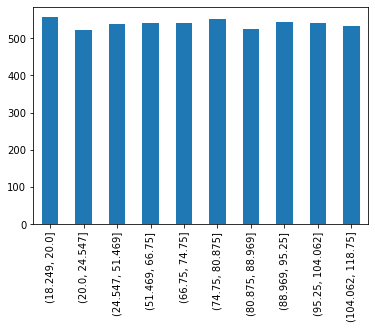

In [162]:
(
 is_Services.MonthlyCharges.pipe(
 lambda ser: pd.qcut(ser, q=10)
 ).value_counts().sort_index().plot.bar()
)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

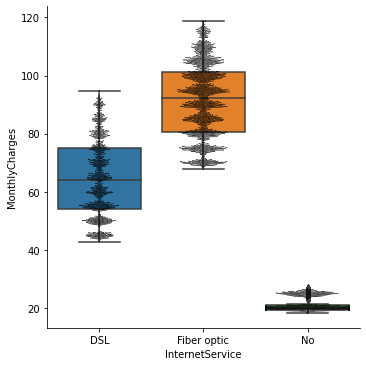

In [163]:
# 매달 내는 요금이 어느정도인지 살펴보기 위함이므로 MonthlyCharges 열 사용
g =sns.catplot(x='InternetService', y='MonthlyCharges', data=is_Services, kind='box')
sns.swarmplot(x='InternetService', y='MonthlyCharges', data=is_Services, color='k', size=1, ax=g.ax)

1. 여기서 DSL을 제공받는 사람들은 평균 60.56달러, 최소 40 최대 100 미만으로 분포되어있고, 
2. FOI의 경우 평균 91.56250 달러, 최소 60달러 이상 최대 약 120달러까지로 분포되어 있다.
3. 여기서 나타나는 결론 도출은 
 ★ 만약 DSL과 FOI의 서비스 수준의 차이가 극명하게 나타나, FOI의 서비스가 필요한 사람들에게는 좋은 선택지나, 
 둘의 수준의 경우가 비슷하거나 서비스를 받는데에 있어 FOI의 수준까지 필요없는 사람들은 DSL에서 제공하는 인터넷 서비스로 바꾸는 것을 추천한다는 것이다.
 ★ 인터넷 서비스를 이용하지 않은 사람들과 사용하는 사람들의 금액차이가 매우 두드러지게 보이게 됨으로, 
 서비스가 필수적이지 않은 사람들은 경제적 비용을 위해 하지 않거나, 그나마 비용이 적은 DSL을 추천할 것이다.
 
 -DSL: 지역 전화망을 통해 디지털 데이터 전송을 제공하는 기술의 계열
 
 -FOI: 광 섬유를 이용한 인터넷 서비스

2. 서비스를 받는 사람들은 기기 보험을 들었을 것인가?

In [164]:
Device = ['PhoneService', 'InternetService', 'DeviceProtection']
Is_Device= telecom[Device]
Is_Device.head()

,PhoneService,InternetService,DeviceProtection
0,Yes,No,No internet service
1,Yes,Fiber optic,Yes
2,Yes,Fiber optic,No
3,Yes,DSL,No
4,Yes,DSL,Yes


In [165]:
#90%의 사람들을 뽑아내기 #5396명
Device_Yes = Is_Device['PhoneService'] == 'Yes'
Device_Yes = Is_Device[Device_Yes]
Device_Yes.info() # 5396 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5396 entries, 0 to 5985
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PhoneService      5396 non-null   category
 1   InternetService   5396 non-null   category
 2   DeviceProtection  5396 non-null   category
dtypes: category(3)
memory usage: 58.3 KB


In [166]:
#10%의 사람들을 뽑아내기 #590명
Device_No = Is_Device['PhoneService'] == 'No'
Device_No = Is_Device[Device_No]
Device_No.info() # 5396

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 5 to 5980
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PhoneService      590 non-null    category
 1   InternetService   590 non-null    category
 2   DeviceProtection  590 non-null    category
dtypes: category(3)
memory usage: 6.6 KB


- 90%, 10%로 나누지 않고 한 crosstab

In [167]:
pd.crosstab(Is_Device.InternetService,Is_Device.DeviceProtection)

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,1158,0,910
Fiber optic,1482,0,1145
No,0,1291,0


In [168]:
pd.crosstab([Is_Device.InternetService,Is_Device.DeviceProtection],Is_Device.PhoneService)

PhoneService                          No   Yes
InternetService DeviceProtection              
DSL             No                   326   832
                Yes                  264   646
Fiber optic     No                     0  1482
                Yes                    0  1145
No              No internet service    0  1291

<AxesSubplot:xlabel='InternetService,PhoneService'>

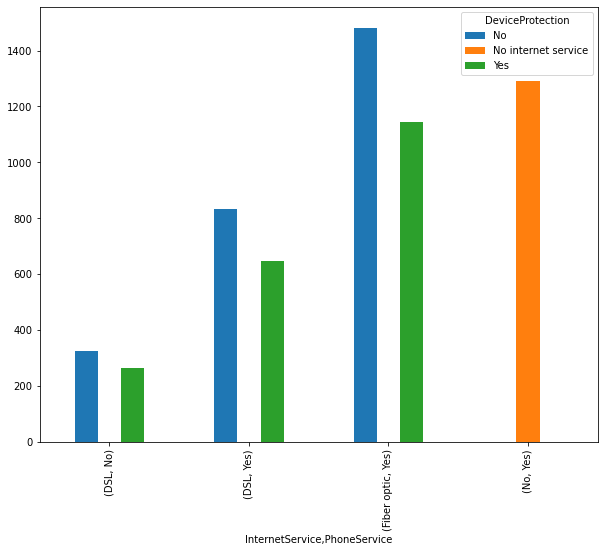

In [169]:
# crosstab 을 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 8))
(
 Is_Device.pipe(lambda df_: pd.crosstab([Is_Device.InternetService,Is_Device.PhoneService],Is_Device.DeviceProtection))
 .plot.bar(ax=ax)
)

- Device_Yes, Device_No의 crosstab

<AxesSubplot:xlabel='InternetService'>

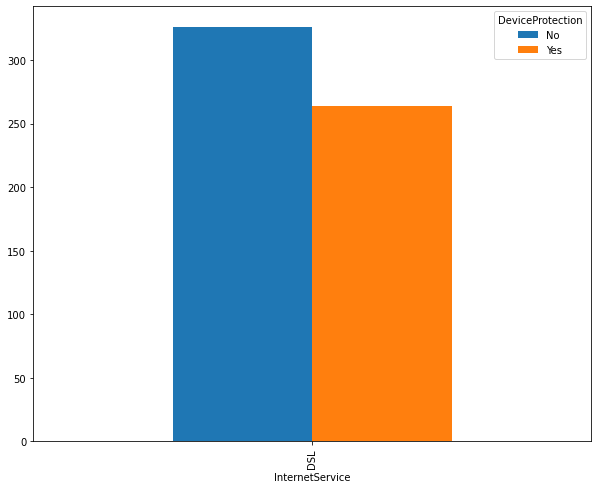

In [170]:
pd.crosstab(Device_No.DeviceProtection,Device_No.InternetService)

# crosstab 을 시각화합니다.
fig, ax = plt.subplots(figsize=(10, 8))
(
 Device_No.pipe(lambda df_: pd.crosstab(Device_No.InternetService,Device_No.DeviceProtection))
 .plot.bar(ax=ax)
)

<AxesSubplot:xlabel='InternetService'>

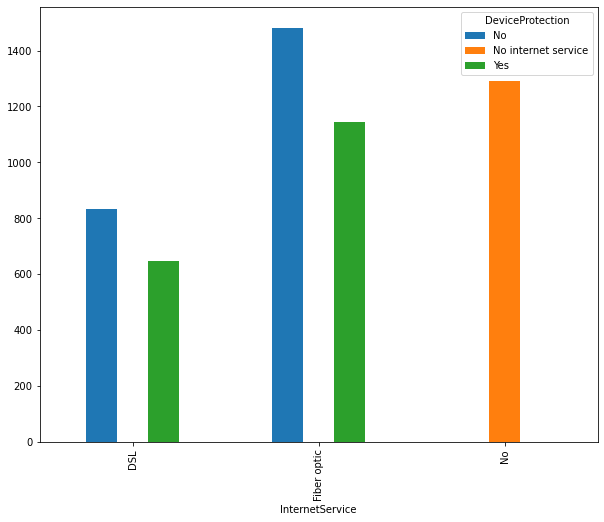

In [171]:
pd.crosstab(Device_Yes.DeviceProtection,Device_Yes.InternetService)

fig, ax = plt.subplots(figsize=(10, 8))
(
 Device_Yes.pipe(lambda df_: pd.crosstab(Device_Yes.InternetService,Device_Yes.DeviceProtection))
 .plot.bar(ax=ax)
)

- 2번째 분석 포인트에 대한 결론
서비스를 받는 사람들 중 기기 보험을 든 사람들보다, 안 들은 사람들이 더 많았으며 DSL,FOI를 가리지 않고 
보험을 듣지 않은 사람들이 %차치하고 있음을 보였다.
그리고 서비스를 받지 않는 다고 해서 아예 기기 보험을 들지 않을 것 편견을 보여주는 결론임을 알 수 있다. 

★ 기기보험의 경우, 서비스의 유무에 따라 달라지지 않는다는 것을 알 수 있었고, 서비스를 받지 않는다고 해서 기기보험을 들지 않는것도 아니다라는 결론을 내릴 수 있다.

3. 기기 보험을 든 사람들은 요금을 많이 내는 쪽인가, 적게 내는 쪽인가? 

In [172]:
DeviceMomey = ['DeviceProtection', 'MonthlyCharges', 'TotalCharges']
DeviceMomey= telecom[DeviceMomey]
DeviceMomey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   DeviceProtection  5986 non-null   category
 1   MonthlyCharges    5986 non-null   float32 
 2   TotalCharges      5976 non-null   float32 
dtypes: category(1), float32(2)
memory usage: 52.8 KB


In [173]:
#비율 탐색
DeviceMomey.DeviceProtection.value_counts("No")

No                     0.441029
Yes                    0.343301
No internet service    0.215670
Name: DeviceProtection, dtype: float64

In [174]:
DeviceMean = DeviceMomey.groupby(by=['DeviceProtection'],as_index=False).mean()
DeviceMean

,DeviceProtection,MonthlyCharges,TotalCharges
0,No,70.560051,1815.715942
1,No internet service,21.091825,663.434937
2,Yes,84.865562,3942.039551


In [175]:
DeviceMean.mean()
#DeviceMean.MonthlyCharges.mean(), DeviceMean.TotalCharges.mean()의 결과와 같다.

MonthlyCharges      58.839146
TotalCharges      2140.396729
dtype: float64

In [176]:
#no인 사람들의 평균 금액을 내는 비율 
n1 = DeviceMomey.DeviceProtection == 'No'
n2 = DeviceMomey.MonthlyCharges <= 70.56250
n3 = DeviceMomey.TotalCharges <= 1816.0

n_final_No = n1 &n2 &n3

In [177]:
DeviceMomey[n_final_No].groupby(by=['DeviceProtection'],as_index=False).mean()

,DeviceProtection,MonthlyCharges,TotalCharges
0,No,50.059513,507.06076
1,No internet service,NaN,NaN
2,Yes,NaN,NaN


In [178]:
DeviceMomey[n_final_No].groupby(by=['DeviceProtection'],as_index=False).quantile()

,DeviceProtection,MonthlyCharges,TotalCharges
0,No,50.09375,300.75
1,No internet service,NaN,NaN
2,Yes,NaN,NaN


In [179]:
#n_final.head()
DeviceMomey[n_final_No]

,DeviceProtection,MonthlyCharges,TotalCharges
3,No,55.90625,238.50000
7,No,24.90625,24.90625
11,No,51.18750,1562.00000
19,No,46.34375,667.50000
24,No,69.62500,69.62500
...,...,...,...
5942,No,44.43750,369.25000
5966,No,59.25000,436.50000
5967,No,64.81250,1176.00000
5978,No,45.25000,74.18750


In [180]:
# 평균금액을 내는 사람들 = 4명 
print((947  /2640) * 100)

35.87121212121212


In [181]:
#Yes인 사람들의 평균 금액을 내는 비율 
n1_Yes = DeviceMomey.DeviceProtection == 'Yes'
n2_Yes = DeviceMomey.MonthlyCharges <= 84.87500
n3_Yes = DeviceMomey.TotalCharges <= 3942.0

n_final_Yes = n1_Yes &n2_Yes &n3_Yes

DeviceMomey[n_final_Yes]

,DeviceProtection,MonthlyCharges,TotalCharges
4,Yes,53.43750,119.500
5,Yes,49.84375,3370.000
8,Yes,35.56250,1309.000
10,Yes,68.75000,3482.000
13,Yes,54.90625,2614.000
...,...,...,...
5939,Yes,64.37500,1559.000
5949,Yes,77.37500,206.125
5963,Yes,50.81250,463.500
5964,Yes,36.25000,1151.000


In [182]:
DeviceMomey[n_final_Yes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 4 to 5972
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   DeviceProtection  660 non-null    category
 1   MonthlyCharges    660 non-null    float32 
 2   TotalCharges      660 non-null    float32 
dtypes: category(1), float32(2)
memory usage: 11.1 KB


In [183]:
DeviceMomey[n1_Yes].MonthlyCharges.describe()

count    2055.000000
mean       84.865562
std        20.860399
min        29.093750
25%        70.125000
50%        88.687500
75%       102.625000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [184]:
DeviceMomey[n1_Yes].TotalCharges.describe()

count    2052.000000
mean     3942.040283
std      2369.191406
min        35.906250
25%      1905.750000
50%      3982.000000
75%      5897.000000
max      8688.000000
Name: TotalCharges, dtype: float64

In [185]:
print((660 /2055) * 100)

32.11678832116788


In [186]:
#인터넷 서비스를 하는 사람들의 비율
n_final = DeviceMean.iloc[[0,2],:]
#n_final.mean() #77.75, 2880.00
n_final

,DeviceProtection,MonthlyCharges,TotalCharges
0,No,70.560051,1815.715942
2,Yes,84.865562,3942.039551


In [187]:
n_final_mon = DeviceMomey.MonthlyCharges <= 77.75
n_final_tol = DeviceMomey.TotalCharges <= 2880.00

n_final_all = n_final_mon & n_final_tol

DeviceMomey[n_final_all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3058 entries, 0 to 5985
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   DeviceProtection  3058 non-null   category
 1   MonthlyCharges    3058 non-null   float32 
 2   TotalCharges      3058 non-null   float32 
dtypes: category(1), float32(2)
memory usage: 50.9 KB


In [188]:
print((3058 /5986) * 100)

51.08586702305379


(중간 평가일때 했던 내용)
보험을 드는 사람들 중, MonthlyCharges, TotalCharges의 평균보다 아래의 금액을 내는 사람들의 2055중 236 밖에 되지 않음을 알 수 있다. 
- 이 수치의 경우 약 11.5%의 사람이 존재함을 보여준다.
- 즉, 평균적 금액을 쓰고 있는 사람 혹은 그 이하의 금액을 내는 사람들의 경우 기기 보험을 들지 않는다.

(피드백 후)(결과)
1. 인터넷 서비스를 듣는 사람들의 경우 
보험을 드는 사람들 중, MonthlyCharges, TotalCharges의 평균보다 아래의 금액을 내는 사람들의 2055명 중 660이 존재한다.
- 이 수치의 경우 약 32.12%를 차지 하고 있다. 
- MonthlyCharges, TotalCharges 평균은 84.87500, 3942.0으로 나타난다.
보험을 들지 않는 사람들 중, MonthlyCharges, TotalCharges의 평균보다 아래의 금액을 내는 사람들의 2640명 중 947 존재한다.
- 이 수치의 경우 약 35.8%를 차지 하고 있다. 
- MonthlyCharges, TotalCharges 평균은 50.0625, 507.0으로 나타난다.
2. 인타넷 서비스를 듣지 않는 경우 
약 0.22%로 이 군집들의  MonthlyCharges, TotalCharges의 평균 금액은 21.09375, 663.5로 나타난다. 

*즉 기기 보험을 든 사람들은 34%로 이 군집에 속한 MonthlyCharges, TotalCharges 평균은 84.87500, 3942.0로 요금을 많이 내는 쪽이라고 할 수 있다.
*만약 요금에 인터넷 서비스를 하려고 하는 사람에게, 기기 보험을 들려고 한다면 최소 매달 34달러씩 차이가 나타나므로 경제적인 여유가 없을 경우 
기기보험을 들지 않는 것을 추천한다.

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DeviceProtection', ylabel='TotalCharges'>

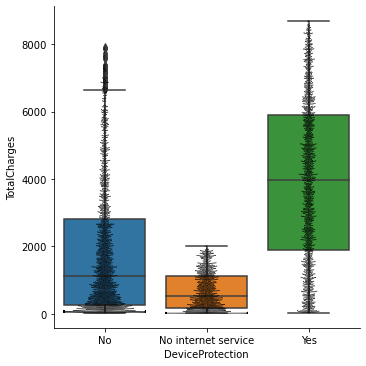

In [189]:
# 총 요금에서의 기기 보험 유무 확인 위함이므로 TotalCharges 열 사용
g =sns.catplot(x='DeviceProtection', y='TotalCharges', data=DeviceMomey, kind='box')
sns.swarmplot(x='DeviceProtection', y='TotalCharges', data=DeviceMomey, color='k', size=1, ax=g.ax)

C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='DeviceProtection', ylabel='MonthlyCharges'>

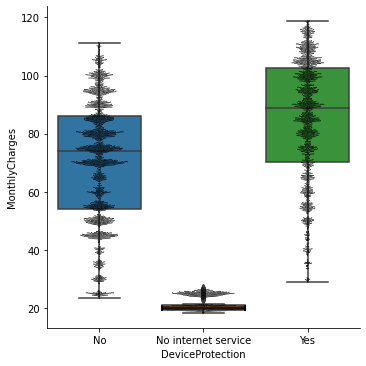

In [190]:
# 매달 내는 요금이 어느정도인지 살펴보기 위함이므로 MonthlyCharges 열 사용
e =sns.catplot(x='DeviceProtection', y='MonthlyCharges', data=DeviceMomey, kind='box')
sns.swarmplot(x='DeviceProtection', y='MonthlyCharges', data=DeviceMomey, color='k', size=1, ax=e.ax)

<AxesSubplot:ylabel='Density'>

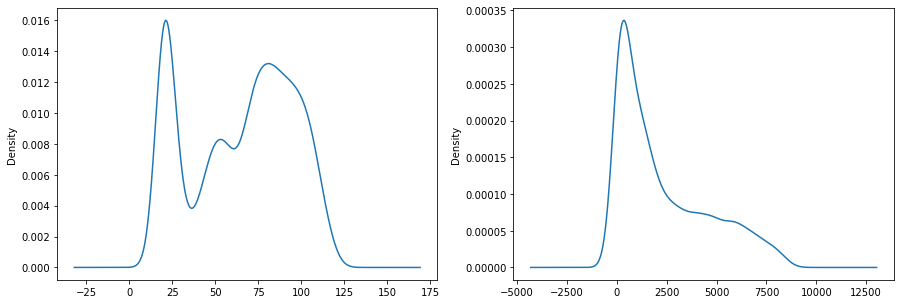

In [547]:
Money_month= DeviceMomey['MonthlyCharges']
import matplotlib.pyplot as plt
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2) 
figure.set_size_inches(15,5) 
telecom['MonthlyCharges'].plot.kde(ax= ax1)
telecom['TotalCharges'].plot.kde(ax= ax2)

4. 서비스를 받는 사람들은 Contract, InternetService는 어떻게 분포되어있는가?
- -> InternetService는 위에서 많이 다룬것 처럼 / 쓰는 사람 90%, 안쓰는 사람 10%로 나타낼 수 있다.

<AxesSubplot:xlabel='InternetService,PhoneService'>

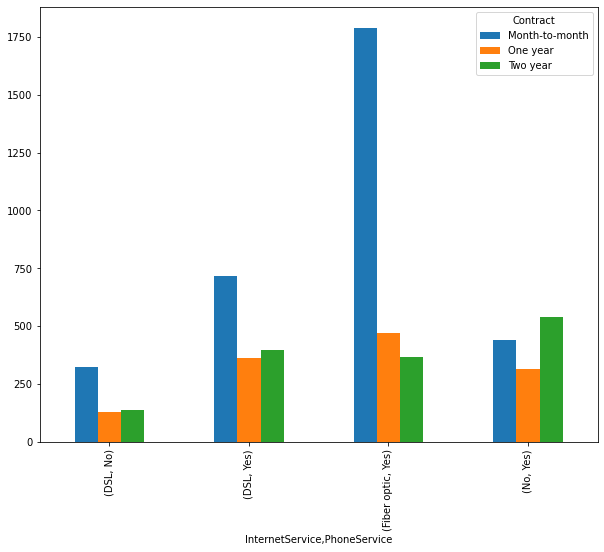

In [192]:
fig, ax = plt.subplots(figsize=(10, 8))
(
 Device_Yes.pipe(lambda df_: pd.crosstab([telecom.InternetService,telecom.PhoneService],telecom.Contract))
 .plot.bar(ax=ax)
)

In [193]:
pd.crosstab([telecom.InternetService,telecom.PhoneService],telecom.Contract)

Contract                      Month-to-month  One year  Two year
InternetService PhoneService                                    
DSL             No                       324       130       136
                Yes                      717       363       398
Fiber optic     Yes                     1790       469       368
No              Yes                      438       314       539

- 4번의 결론 
0. 서비스를 받는 사람들의 경우 'Month-to-month'의 형태로 계약하였음을 나타내고 그 중 InternetService를 받지 않는 사람들은 'Two year'로 계약한 형태가 더 많음을 나타낸다. 

## 4. 분석 결과

#### 분석에 대한 결론

telecom의 데이터 파일을 통해 결론을 낼 수 있는 것들은, 
1. 모바일핸드폰 서비스를 받는 경우 인터넷 서비스를 같이 하는 경우들이 90%이상이였으며,
2. 그 중 인터넷 서비스를 이용하는 사람들이 77%로 과반수가 이용하고 있다.
3. 인터넷 서비스는 DSL, FOI로 두 가지 제공자가 존재하며 좀 더 비싸고 서비스의 속도가 좋은 것은 FOI(Fiber Optic InternetService)이다. 
4. 다만 FOI의 서비스에 비례하여 값도 평균이 약40달러 높기 때문에 그 정도의 서비스가 필요없다면 DSL이 합리적이다. 
5. 기기보험의 경우 서비스를 받더라도 들지 않은 경우가 많으며, 보험을 들지 않은 쪽의 경우 'TotalCharges'가 매우 적은 비용 결과를 보여주었다.
6. 마지막으로 대부분의 서비스를 받는 사람들은 Month-to-month 의 형태로 계약을 했다는 것을 나타낸다.

-> 이 결론으로 만약 모바일핸드폰 인터넷서비스를 제공 받으려는 처음 사람에게 추천해줄 수 있는데 
1. 서비스를 할 경우 DSL, FOI 중 서비스품질을 좋은 것을 선택하려고 한다면 FOI, 그렇지 않은 경우 가격이 저렴한 편인 DSL을 추천할 수 있다. 
2. 기기 보험의 경우 들지 않은 사람들이 꽤 존재하기 때문에, 경제적면에서 부담스럽다면 들지 않은 것을 권하고, 아닐 경우 사용자의 생활패턴에 맞는 선택을 하도록 고려한다. 
3. 마지막으로 계약 형태를 고민한다면 'Month-to-month'의 형태를 추천한다.

## 5. 중간 피드백 이후 관련 데이터 분석

### 중간 보고서 피드백 :  categorical variable - groupby 활용하기

- 5. 범주형 열과 MonthlyCharges, TotalCharges 그래프 간의 시각화 살펴보기

In [284]:
telecom.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [257]:
telecom.iloc[:,[5,18,19]].groupby(telecom['gender']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
             mean        std           mean        std         mean   
gender                                                                
Female  32.388624  24.511789      65.240700  30.153241  2305.854736   
Male    32.545902  24.524591      64.380363  30.076626  2290.567627   

                     
                std  
gender               
Female  2294.370711  
Male    2254.818669

In [258]:
telecom.iloc[:,[5,18,19]].groupby(telecom['SeniorCitizen']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
                    mean        std           mean        std         mean   
SeniorCitizen                                                                
0              32.409960  24.612706      61.904209  30.367805  2205.040039   
1              32.774327  24.019871      79.863029  23.611307  2780.541504   

                            
                       std  
SeniorCitizen               
0              2248.173032  
1              2347.008864

In [259]:
telecom.iloc[:,[5,18,19]].groupby(telecom['Partner']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
              mean        std           mean        std         mean   
Partner                                                                
No       23.379299  21.716174      61.762375  28.980370  1585.931152   
Yes      42.115358  23.619022      68.028641  30.953798  3055.450928   

                      
                 std  
Partner               
No       1872.659059  
Yes      2414.690443

In [260]:
telecom.iloc[:,[5,18,19]].groupby(telecom['PhoneService']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
                   mean        std           mean        std         mean   
PhoneService                                                                
No            31.698305  24.084187      41.942345  11.362206  1493.543701   
Yes           32.553002  24.563918      67.301857  30.472717  2385.866699   

                           
                      std  
PhoneService               
No            1330.665129  
Yes           2337.706804

In [261]:
telecom.iloc[:,[5,18,19]].groupby(telecom['MultipleLines']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
                       mean        std           mean        std         mean   
MultipleLines                                                                   
No                23.987360  22.129513      54.062653  28.552869  1340.489746   
No phone service  31.698305  24.084187      41.942345  11.362206  1493.543701   
Yes               42.127159  23.599598      82.099838  25.309328  3553.649414   

                               
                          std  
MultipleLines                  
No                1634.060203  
No phone service  1330.665129  
Yes               2450.225586

In [262]:
telecom.iloc[:,[5,18,19]].groupby(telecom['InternetService']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
                      mean        std           mean        std         mean   
InternetService                                                                
DSL              32.776596  24.796811      58.106056  16.425130  2121.473389   
Fiber optic      33.228017  24.380836      91.554604  12.715182  3236.398438   
No               30.430674  24.245363      21.091825   2.186129   663.434937   

                              
                         std  
InternetService               
DSL              1888.838881  
Fiber optic      2569.419520  
No                553.279248

In [263]:
telecom.iloc[:,[5,18,19]].groupby(telecom['OnlineSecurity']).agg(['mean','std'])

tenure            MonthlyCharges             \
                          mean        std           mean        std   
OnlineSecurity                                                        
No                   25.967471  22.620417      75.432426  21.788452   
No internet service  30.430674  24.245363      21.091825   2.186129   
Yes                  45.322242  22.918692      79.239792  22.227401   

                    TotalCharges               
                            mean          std  
OnlineSecurity                                 
No                   2140.459961  2128.467674  
No internet service   663.434937   553.279248  
Yes                  3802.158203  2374.335827

In [264]:
telecom.iloc[:,[5,18,19]].groupby(telecom['OnlineBackup']).agg(['mean','std'])

tenure            MonthlyCharges             \
                          mean        std           mean        std   
OnlineBackup                                                          
No                   23.858733  21.554418      71.761711  21.129815   
No internet service  30.430674  24.245363      21.091825   2.186129   
Yes                  44.459330  23.260230      83.128235  21.485752   

                    TotalCharges               
                            mean          std  
OnlineBackup                                   
No                   1842.203369  1891.522932  
No internet service   663.434937   553.279248  
Yes                  3873.331299  2402.565656

In [265]:
telecom.iloc[:,[5,18,19]].groupby(telecom['DeviceProtection']).agg(['mean','std'])

tenure            MonthlyCharges             \
                          mean        std           mean        std   
DeviceProtection                                                      
No                   23.856439  21.777811      70.560051  20.843353   
No internet service  30.430674  24.245363      21.091825   2.186129   
Yes                  44.813139  22.856632      84.865562  20.860394   

                    TotalCharges               
                            mean          std  
DeviceProtection                               
No                   1815.715942  1887.866507  
No internet service   663.434937   553.279248  
Yes                  3942.039551  2369.192168

In [266]:
telecom.iloc[:,[5,18,19]].groupby(telecom['StreamingTV']).agg(['mean','std'])

tenure            MonthlyCharges             \
                          mean        std           mean        std   
StreamingTV                                                           
No                   25.051486  22.561628      65.341431  18.827021   
No internet service  30.430674  24.245363      21.091825   2.186129   
Yes                  41.294016  23.812706      88.714912  18.504881   

                    TotalCharges               
                            mean          std  
StreamingTV                                    
No                   1744.743286  1772.955742  
No internet service   663.434937   553.279248  
Yes                  3783.887451  2444.480865

In [267]:
telecom.iloc[:,[5,18,19]].groupby(telecom['TechSupport']).agg(['mean','std'])

tenure            MonthlyCharges             \
                          mean        std           mean        std   
TechSupport                                                           
No                   25.948649  22.567792      74.429916  21.537186   
No internet service  30.430674  24.245363      21.091825   2.186129   
Yes                  45.108934  23.078453      80.901855  22.249991   

                    TotalCharges               
                            mean          std  
TechSupport                                    
No                   2095.656250  2074.116684  
No internet service   663.434937   553.279248  
Yes                  3856.635498  2406.000766

In [268]:
telecom.iloc[:,[5,18,19]].groupby(telecom['StreamingMovies']).agg(['mean','std'])

tenure            MonthlyCharges             \
                          mean        std           mean        std   
StreamingMovies                                                       
No                   24.547963  22.332059      65.297226  18.830205   
No internet service  30.430674  24.245363      21.091825   2.186129   
Yes                  41.572039  23.738476      88.429672  18.655432   

                    TotalCharges               
                            mean          std  
StreamingMovies                                
No                   1703.671387  1752.216148  
No internet service   663.434937   553.279248  
Yes                  3794.696777  2428.674574

In [269]:
telecom.iloc[:,[5,18,19]].groupby(telecom['Contract']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
                     mean        std           mean        std         mean   
Contract                                                                      
Month-to-month  18.082288  17.645746      66.306198  26.929832  1371.921387   
One year        41.864420  19.018083      65.148056  31.874026  3032.499023   
Two year        56.785566  18.205706      61.084621  34.711000  3758.384277   

                             
                        std  
Contract                     
Month-to-month  1613.876232  
One year        2228.457902  
Two year        2578.843335

In [270]:
telecom.iloc[:,[5,18,19]].groupby(telecom['PaperlessBilling']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
                       mean        std           mean        std         mean   
PaperlessBilling                                                                
No                32.275834  24.484136      51.965939  29.694709  1855.995972   
Yes               32.603175  24.541410      73.745613  27.015233  2605.448975   

                               
                          std  
PaperlessBilling               
No                2028.617616  
Yes               2382.676791

In [271]:
telecom.iloc[:,[5,18,19]].groupby(telecom['PaymentMethod']).agg(['mean','std'])

tenure            MonthlyCharges             \
                                mean        std           mean        std   
PaymentMethod                                                               
Bank transfer (automatic)  43.068807  23.258466      67.635048  30.419196   
Credit card (automatic)    43.445127  23.233137      66.416130  30.595664   
Electronic check           25.551844  22.559714      76.257744  24.176921   
Mailed check               22.029218  21.253291      43.774231  26.285022   

                          TotalCharges               
                                  mean          std  
PaymentMethod                                        
Bank transfer (automatic)  3068.931396  2351.816566  
Credit card (automatic)    3085.323730  2408.564063  
Electronic check           2122.391846  2180.693139  
Mailed check               1065.065552  1456.004531

In [272]:
telecom.iloc[:,[5,18,19]].groupby(telecom['Churn']).agg(['mean','std'])

tenure            MonthlyCharges            TotalCharges  \
            mean        std           mean        std         mean   
Churn                                                                
No     37.599682  24.065131      61.424675  31.086166  2568.305176   
Yes    18.246377  19.667262      74.164886  24.965208  1550.700928   

                    
               std  
Churn               
No     2335.470834  
Yes    1905.691566

- 범주형 열들을 가지고 groupby을 이용하여 tenure,MonthlyCharges,TotalCharges의 sum과 mean 값을 알아본 결과, 
- 인터넷 서비스 관련된 항목의 열들은 MonthlyCharges, TotalCharges의 값과 평균의 차이가 나는 결과가 나타난다. 
- 성별의 경우는 서비스의 여부와 MonthlyCharges,TotalCharges에 영향을 미치지 않는 변수이다. 
- Contract(계약의 형태)와 PaymentMethod는 tenure,MonthlyCharges,TotalCharges의 차이가 나타나는 변수이다. 
- Churn (이탈 여부)도 tenure의 차이, TotalCharges의 금액 차이를 나타내는 변수이다.

#### pairplot을 이용한 groupby의 결론에 대한 시각화 확인

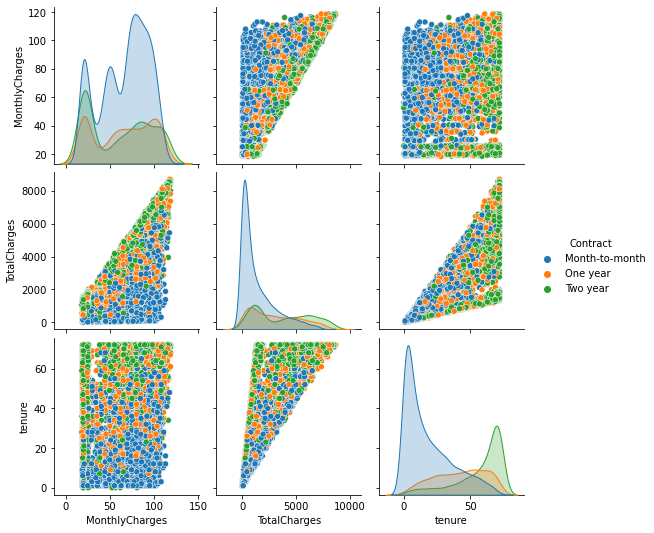

In [256]:
#Contract 
sns.pairplot(telecom[['MonthlyCharges','TotalCharges','tenure','Contract']], hue='Contract')

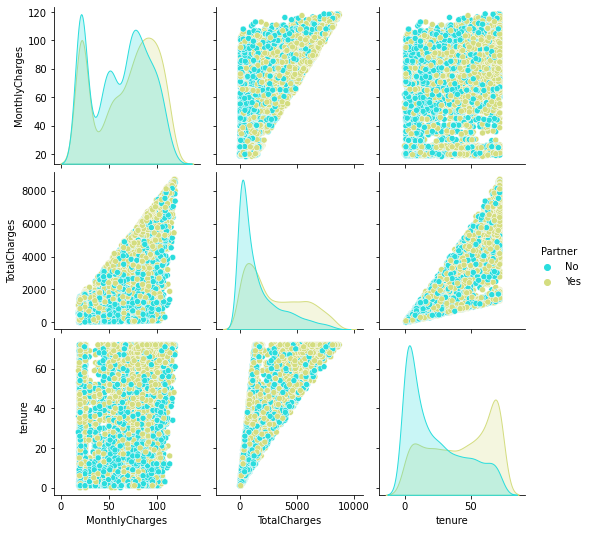

In [253]:
#Partner
sns.pairplot(telecom[['MonthlyCharges','TotalCharges','tenure','Partner']], hue='Partner', palette="rainbow")

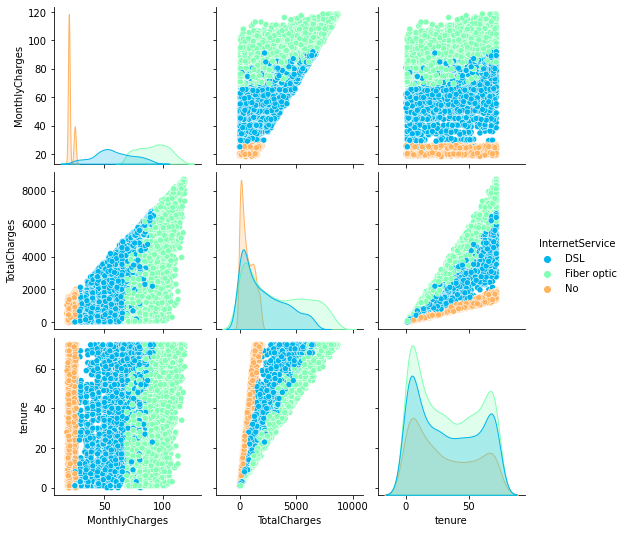

In [254]:
#InternetService
sns.pairplot(telecom[['MonthlyCharges','TotalCharges','tenure','InternetService']], hue='InternetService', palette="rainbow")

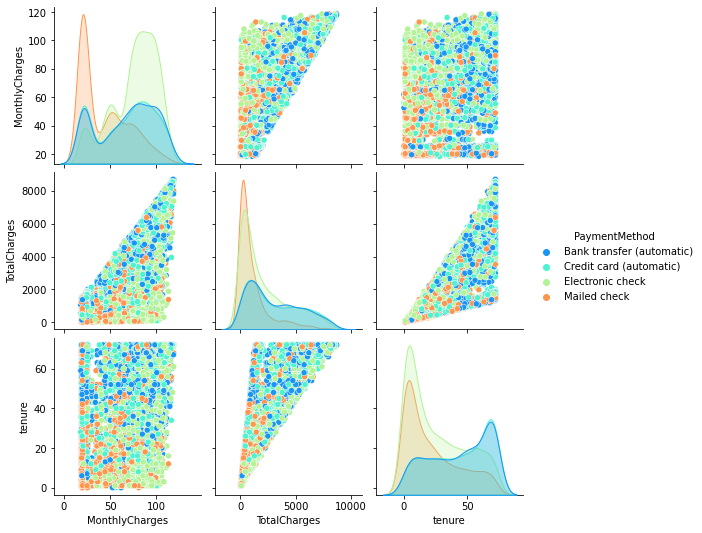

In [276]:
#PaymentMethod
sns.pairplot(telecom[['MonthlyCharges','TotalCharges','tenure','PaymentMethod']], hue='PaymentMethod', palette="rainbow")

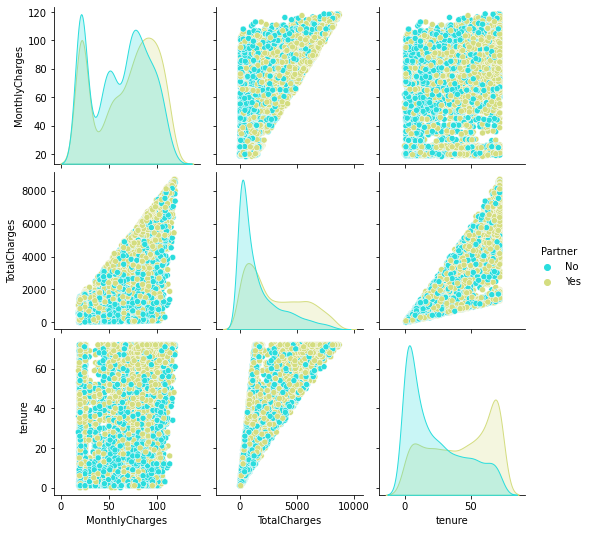

In [273]:
#Partner
sns.pairplot(telecom[['MonthlyCharges','TotalCharges','tenure','Partner']], hue='Partner', palette="rainbow")

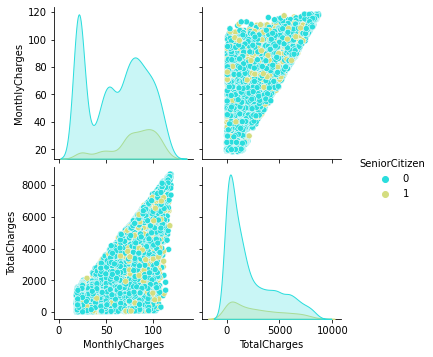

In [280]:
#SeniorCitizen
sns.pairplot(telecom[['MonthlyCharges','TotalCharges','SeniorCitizen']], hue='SeniorCitizen', palette="rainbow")

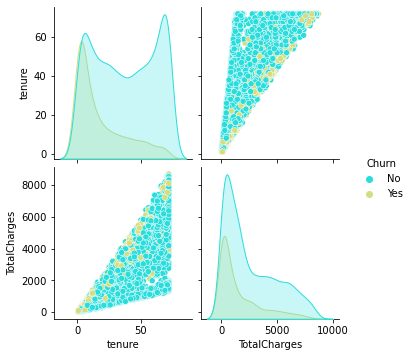

In [278]:
#Churn
sns.pairplot(telecom[['tenure','TotalCharges','Churn']], hue='Churn', palette="rainbow")

- 시각화 결과, 독립변수들 중 SeniorCitizen, Partner에 대한 MonthlyCharges, TotalCharges의 변화가 뚜렷하며, 금액의 차이가 두드러진다. 
- Churn의 경우 yes일 경우 총 금액이 적고, 회사에 대한 머문 월수가 작다. 

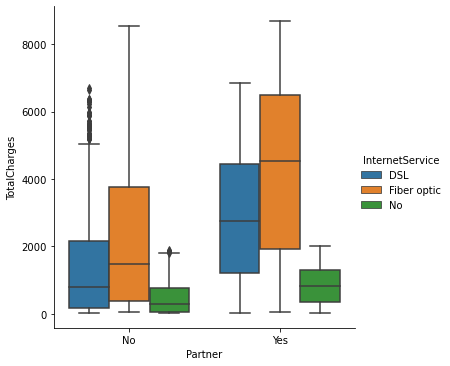

In [291]:
sns.catplot(x='Partner',y= 'TotalCharges', data= telecom, kind='box',hue='InternetService')

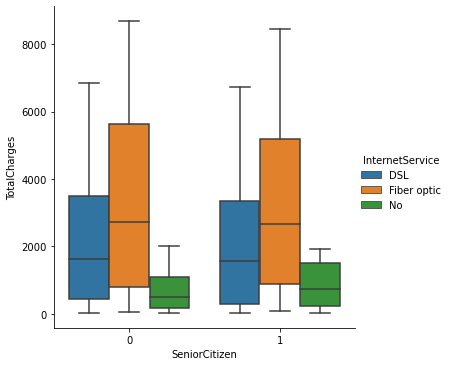

In [292]:
sns.catplot(x='SeniorCitizen',y= 'TotalCharges', data= telecom, kind='box',hue='InternetService')

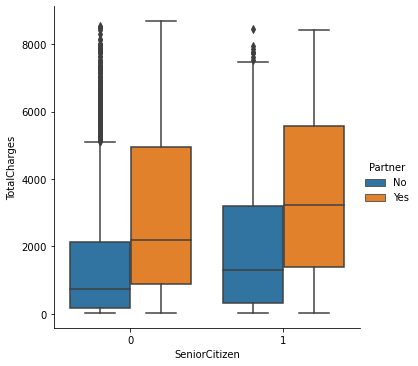

In [293]:
sns.catplot(x='SeniorCitizen' ,y= 'TotalCharges', data= telecom, kind='box',hue='Partner')

- SeniorCitizen 여부에 따른 TotalCharges 차이와 Partner 여부에 따른 TotalCharges 차이의 시각화 결과, 특징적으로 FOI의 방식을 선호하며, 파트너의 여부에 따른 TotalCharges가 좀 더 뚜렷한 변화를 가지고 있다.
- 세번째 플롯 시각화를 통해 Partner가 존재하는 고객들은 요금이 없는 고객들보다 높다는 결과를 나타낸다.

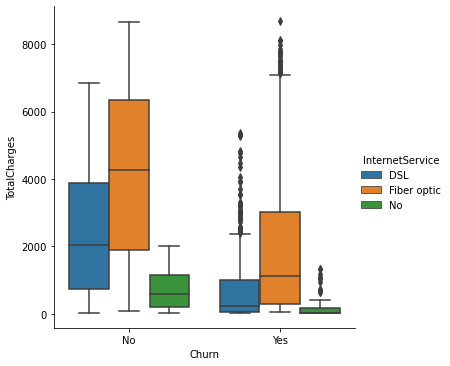

In [288]:
sns.catplot(x='Churn' ,y= 'TotalCharges', kind='box', data= telecom ,hue='InternetService')

- 이탈 여부가 있는 사람들의 경우 총 금액이 그렇지 않은 사람들보다 평균적으로 적다는 결론과, 여부에 상관없이 fiber optical service가 고객들이 많이 이용함을 나타낸다.

- 즉, SeniorCitizen유무(고령 유무), 파트너의 유무, 이탈 여부에 따른 매달 요금과 총요금의 변화 양상이 뚜렷하게 나타나므로 모바일 서비스를 받기 위해 온 고객들의 상황에 따라 인터넷 제공자 추천과 요금적인 부분에 대해 고려하여 추천하면 고객 유치가 가능할 것이다.

#### 범주형 열, 수치형 열에 대한 상관분석

In [433]:
#describe를 통한 기술통계
telecom.describe(include ='category').T

,count,unique,top,freq
gender,5986,2,Male,3050
SeniorCitizen,5986,2,0,5020
Partner,5986,2,No,3082
PhoneService,5986,2,Yes,5396
MultipleLines,5986,3,No,2848
InternetService,5986,3,Fiber optic,2627
OnlineSecurity,5986,3,No,2982
OnlineBackup,5986,3,No,2605
DeviceProtection,5986,3,No,2640
TechSupport,5986,3,No,2960


In [424]:
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.000000,1777.25000,3546.500,5291.750,7042.00
tenure,5986.0,32.468760,24.516391,0.000000,9.00000,29.000,56.000,72.00
MonthlyCharges,5986.0,64.802292,30.114748,18.250000,35.65625,70.375,89.875,118.75
TotalCharges,5976.0,2298.067383,2274.133545,18.796875,404.25000,1412.000,3846.500,8688.00


In [443]:
telecom[['tenure','MonthlyCharges','TotalCharges']].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.256971,0.827438
MonthlyCharges,0.256971,1.000000,0.656523
TotalCharges,0.827438,0.656523,1.000000


In [474]:
telecom_c = telecom.copy()

In [475]:
new = {'Yes':1, 'No':0}
telecom_c.Churn = telecom_c.Churn.replace(new)

In [476]:
telecom_c.Partner = telecom_c.Partner.replace(new)

In [477]:
new2 = {'Two year':2, 'One year':1, 'Month-to-month':0}
telecom_c.Contract = telecom_c.Contract.replace(new2)

In [478]:
new3 = {'Male':1, 'Female':0}
telecom_c.gender = telecom_c.gender.replace(new3)

In [551]:
new4 = {'Fiber optic':2, 'DSL':1, 'No':0}
telecom_c.InternetService = telecom_c.InternetService.replace(new4)

In [552]:
corr = telecom_c[['InternetService','Partner','Churn','tenure','Contract','gender','MonthlyCharges','TotalCharges']].corr()

cm = sns.light_palette("yellow", as_cmap=True)
corr.style.background_gradient(cmap=cm)
#corr.style.highlight_min(color='lightgreen', axis=1)

,InternetService,Partner,Churn,tenure,Contract,gender,MonthlyCharges,TotalCharges
InternetService,1.000000,0.002520,0.310417,0.040537,-0.287621,-0.009764,0.903962,0.432227
Partner,0.002520,1.000000,-0.146840,0.381976,0.300549,-0.007791,0.104002,0.322968
Churn,0.310417,-0.146840,1.000000,-0.348469,-0.396446,-0.009548,0.186751,-0.197633
tenure,0.040537,0.381976,-0.348469,1.000000,0.671551,0.003207,0.256971,0.827438
Contract,-0.287621,0.300549,-0.396446,0.671551,1.000000,-0.001843,-0.068436,0.452764
gender,-0.009764,-0.007791,-0.009548,0.003207,-0.001843,1.000000,-0.014283,-0.003361
MonthlyCharges,0.903962,0.104002,0.186751,0.256971,-0.068436,-0.014283,1.000000,0.656523
TotalCharges,0.432227,0.322968,-0.197633,0.827438,0.452764,-0.003361,0.656523,1.000000


- gender의 경우 범주형 열과 수치형의 열들에 상관성이 있지 않다.

In [553]:
corr2 = telecom_c[['InternetService','Partner','Churn','tenure','Contract','MonthlyCharges','TotalCharges']].corr()

cm2= sns.light_palette("blue", as_cmap=True)
corr2.style.background_gradient(cmap=cm2)

,InternetService,Partner,Churn,tenure,Contract,MonthlyCharges,TotalCharges
InternetService,1.000000,0.002520,0.310417,0.040537,-0.287621,0.903962,0.432227
Partner,0.002520,1.000000,-0.146840,0.381976,0.300549,0.104002,0.322968
Churn,0.310417,-0.146840,1.000000,-0.348469,-0.396446,0.186751,-0.197633
tenure,0.040537,0.381976,-0.348469,1.000000,0.671551,0.256971,0.827438
Contract,-0.287621,0.300549,-0.396446,0.671551,1.000000,-0.068436,0.452764
MonthlyCharges,0.903962,0.104002,0.186751,0.256971,-0.068436,1.000000,0.656523
TotalCharges,0.432227,0.322968,-0.197633,0.827438,0.452764,0.656523,1.000000


Text(0.5, 1.0, 'telecom correlation')

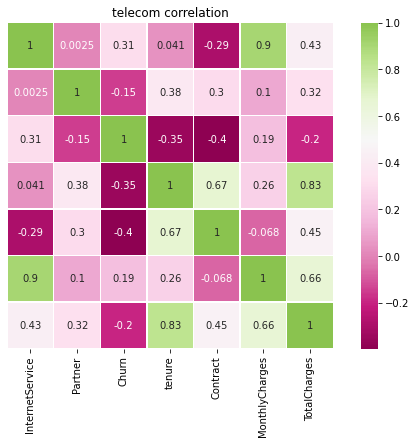

In [554]:
plt.figure(figsize=(10,6))
sns.heatmap(corr2, linewidths =0.4 ,square=True, center=0.5, annot = True, cmap = 'PiYG', yticklabels=False).set_title('telecom correlation')

- 상관 분석 결론과 시각화를 통해 Churn, Contract, MonthlyCharges, TotalCharges가 양 혹은 음의 상관성을 띄고 있다.
- FOI를 선택하는 사람들의 경우 Churn이 1인 경우가 크며, MonthlyCharges, TotalCharges의 금액이 올라간다. 
- FOI를 선택하는 경우, Month-to-month의 계약을 띄고 있다고 할 수 있다.

### 상위 100, 하위 100개의 telecom 데이터는 어떠한 형식으로 분포되어있는가?

-  조건: PhoneService : Yes, InternetService = dsl,fol경우만 -> 이유: 서비스를 하는 사람들의 한해서 100명의 데이터 뽑을 것임

In [580]:
join1 = telecom.PhoneService == 'Yes'
join2 = telecom.InternetService != 'No'
join_all = join1 & join2
group_tel = telecom[join_all]
group_tel_100 =group_tel[['PhoneService','InternetService','Partner','Churn','tenure','Contract','gender','MonthlyCharges','TotalCharges']].sort_values(['MonthlyCharges'],ascending=False).head(100)

In [565]:
group_tel_100 =pd.DataFrame(group_tel_100)
group_tel_100.head()

,PhoneService,InternetService,Partner,Churn,tenure,Contract,gender,MonthlyCharges,TotalCharges
126,Yes,Fiber optic,Yes,No,72,Two year,Female,118.750,8672.0
4457,Yes,Fiber optic,Yes,No,68,Two year,Female,118.625,7992.0
262,Yes,Fiber optic,No,No,71,Two year,Female,118.625,8480.0
5158,Yes,Fiber optic,No,No,61,One year,Female,118.625,7364.0
5183,Yes,Fiber optic,No,Yes,67,One year,Male,118.375,7804.0


In [579]:
group_tel_100.InternetService.unique()

['Fiber optic']
Categories (1, object): ['Fiber optic']

In [567]:
group_tel_100.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.133967,0.987536
MonthlyCharges,0.133967,1.000000,0.234499
TotalCharges,0.987536,0.234499,1.000000


C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dajin\Anacond

<AxesSubplot:ylabel='InternetService'>

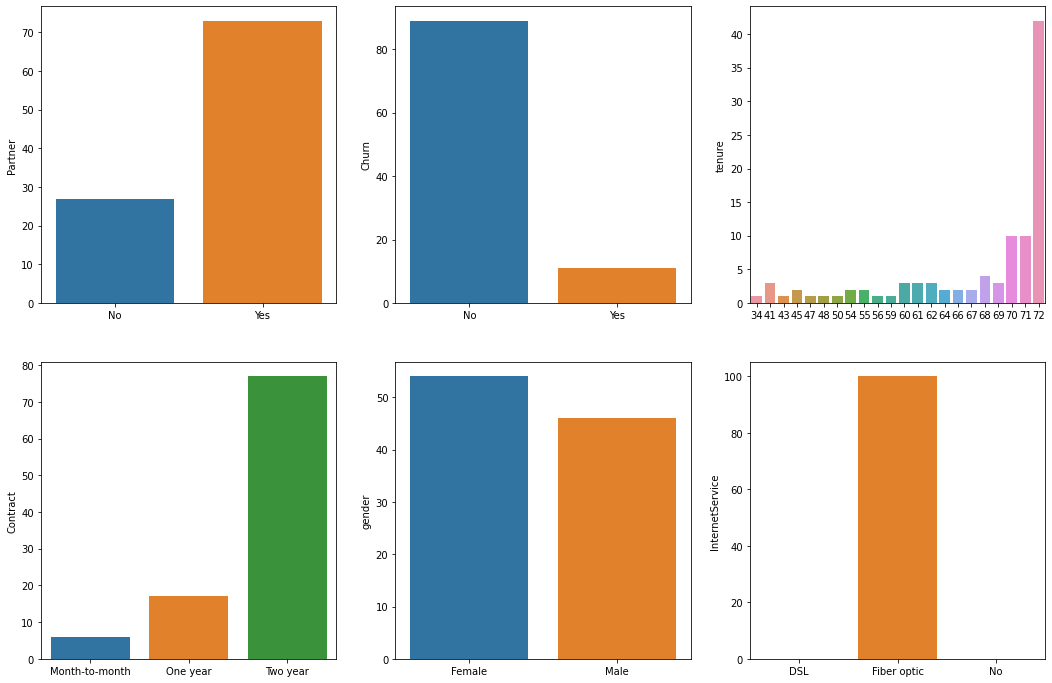

In [568]:
#seaborn
import seaborn as sns
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols =3 ) 
figure.set_size_inches(18,12) 
sns.barplot(group_tel_100.Partner.value_counts().index, group_tel_100.Partner.value_counts(),ax= ax1)
sns.barplot(group_tel_100.Churn.value_counts().index, group_tel_100.Churn.value_counts(),ax= ax2)
sns.barplot(group_tel_100.tenure.value_counts().index, group_tel_100.tenure.value_counts(),ax= ax3)
sns.barplot(group_tel_100.Contract.value_counts().index, group_tel_100.Contract.value_counts(),ax= ax4)
sns.barplot(group_tel_100.gender.value_counts().index, group_tel_100.gender.value_counts(),ax= ax5)
sns.barplot(group_tel_100.InternetService.value_counts().index, group_tel_100.InternetService.value_counts(),ax= ax6)

In [572]:
join1 = telecom.PhoneService == 'Yes'
join2 = telecom.InternetService != 'No'
join3 = telecom.tenure > 1

join_all = join1 & join2 & join3
group_bot = telecom[join_all]
group_bot_100 = group_bot[['PhoneService','InternetService','Partner','Churn','tenure','Contract','gender','MonthlyCharges','TotalCharges']].sort_values(['MonthlyCharges'],ascending=True).head(100)
group_bot_100 = pd.DataFrame(group_bot_100)

group_bot_100
group_bot_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2950 to 2012
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PhoneService     100 non-null    category
 1   InternetService  100 non-null    category
 2   Partner          100 non-null    category
 3   Churn            100 non-null    category
 4   tenure           100 non-null    int8    
 5   Contract         100 non-null    category
 6   gender           100 non-null    category
 7   MonthlyCharges   100 non-null    float32 
 8   TotalCharges     100 non-null    float32 
dtypes: category(6), float32(2), int8(1)
memory usage: 2.8 KB


In [573]:
group_bot_100.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.055142,0.997387
MonthlyCharges,0.055142,1.000000,0.084203
TotalCharges,0.997387,0.084203,1.000000


C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dajin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dajin\Anacond

<AxesSubplot:ylabel='InternetService'>

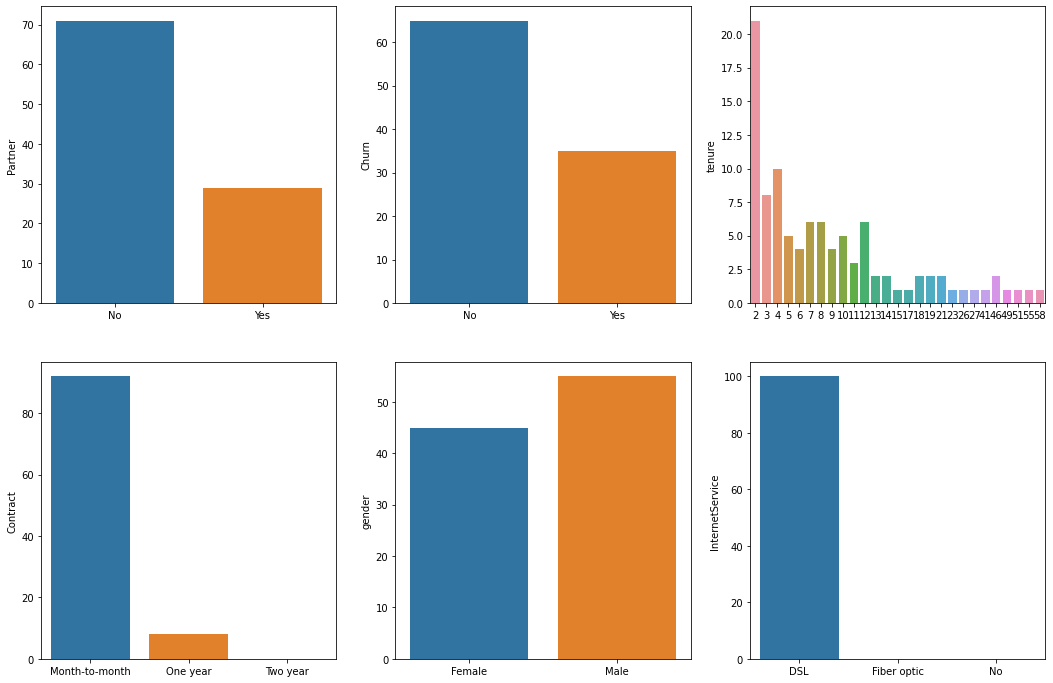

In [574]:
#seaborn
import seaborn as sns
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols =3 ) 
figure.set_size_inches(18,12) 
sns.barplot(group_bot_100.Partner.value_counts().index, group_bot_100.Partner.value_counts(),ax= ax1)
sns.barplot(group_bot_100.Churn.value_counts().index, group_bot_100.Churn.value_counts(),ax= ax2)
sns.barplot(group_bot_100.tenure.value_counts().index, group_bot_100.tenure.value_counts(),ax= ax3)
sns.barplot(group_bot_100.Contract.value_counts().index, group_bot_100.Contract.value_counts(),ax= ax4)
sns.barplot(group_bot_100.gender.value_counts().index, group_bot_100.gender.value_counts(),ax= ax5)
sns.barplot(group_bot_100.InternetService.value_counts().index, group_bot_100.InternetService.value_counts(),ax= ax6)

#### MonthlyCharges 따른 상위 100, 하위 100개의 데이터를 가지고 시각화 결과를 보면, 
1. 상위 100개 데이터의 경우 
- Partner의 여부가 Yes인 경우, Churn의  Yes경우가 적으며, tenure은 최소 31개월부터 존재하며 70개월 넘은 사람들이 많이 분포되어있음을 알 수 있다. 
- 또한, 2년 계약 형태가 많이 분포해 있으며, 여성의 비율이 많고 100명의 고객들이 fiber optic service를 사용하고 있다. 
2. 반면, 하위 100개 데이터의 경우 
- Partner의 여부가 No인 경우가 많았고, Churn의 Yes경우가 비교적 많으며, tenure은 최소 2개월부터 존재하며 2-4개월 넘은 사람들이 많이 분포되어있음을 알 수 있다. 
- 또한, 매달 계약 형태가 많이 분포해 있고, 남성의 비율이 많고 100명의 고객들이 DSL을 사용하고 있다. 

## 6. 총 결론

1. 서비스를 할 경우 DSL, FOI 중 서비스품질을 좋은 것을 선택하려고 한다면 FOI, 그렇지 않은 경우 가격이 저렴한 편인 DSL을 추천할 수 있다. 
2. 기기 보험의 경우 들지 않은 사람들이 꽤 존재하기 때문에, 경제적면에서 부담스럽다면 들지 않은 것을 권하고, 아닐 경우 사용자의 생활패턴에 맞는 선택을 하도록 고려한다. 
3. 마지막으로 계약 형태를 고민한다면 'Month-to-month'의 형태를 추천한다.
4. SeniorCitizen유무(고령 유무), 파트너의 유무, 이탈 여부에 따른 매달 요금과 총요금의 변화 양상이 뚜렷하게 나타나므로 모바일 서비스를 받기 위해 온 고객들의 상황에 따라 인터넷 제공자 추천과 요금적인 부분에 대해 고려하여 추천하면 고객 유치가 가능할 것이다.
  - SeniorCitizen 여부에 따른 TotalCharges 차이와 Partner 여부에 따른 TotalCharges 차이의 시각화 결과, 특징적으로 FOI의 방식을 선호한다.
  - Partner가 존재하는 고객들은 요금이 없는 고객들보다 높다는 결과를 나타낸다.
5. 매달 요금이 상위 100명의 사람들은 Partner가 존재하고 머문 일수가 최소 31개월이며, 여성의 비율이 많고 fiber optic service를 사용한다.
6. 매달 요금이 하ㅟ 100명의 사람들은 머문 일수가 2-4 개월이며, 매달 계약 형태가 많이 분포가 되어있고, 남성의 비율이 많다. 또 DSL 서비스를 사용한다.

____________________________________________________________________________________________________________________________________________________________________